In [148]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [149]:
#importing dataset
mtcars= pd.read_csv("/content/sample_data/mtcars.csv")

In [150]:
#displaying dataset
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [151]:
#To check for null values
mtcars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

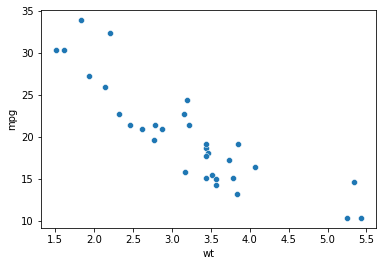

In [152]:
#Plotting the scatterplot to check for linear relationship
sns.scatterplot(x='wt',y='mpg',data=mtcars)

Q6. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear 
Regression given one predictor attribute and one response attribute. The 
function should return the coefficients of the straight line.

Inference: The plot looks fairly linear , hence a linear regression could fit well for both these variables    

In [153]:
#defining a Simple Linear Regression Function
def myFnLinReg(x,y):
    n=len(x)
    mean_x=x.mean()
    mean_y=y.mean()
    
    #Coefficient term
    A1_numerator=((x-mean_x)*(y-mean_y)).sum()
    A1_denominator=((x - mean_x)**2).sum()
    A1=A1_numerator/A1_denominator
    
    #Intercept term
    A0=mean_y - (mean_x*A1)
      
    reg = 'y = {} + {}β'.format(A0, round(A1, 4))
    
    return (A0, A1, reg)  #This function returns the intercept ,coefficient of independent varible and the regression model

In [154]:
#creating separate dataframes for predictor and output variables
X=mtcars['wt']
Y=mtcars['mpg']

In [155]:
display(X.head())

0    2.620
1    2.875
2    2.320
3    3.215
4    3.440
Name: wt, dtype: float64

In [156]:
display(Y.head())

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

Q7. Use mtcars data set and consider the attributes mpg and weight. Split data into 
train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to 
build a linear regression model to predict mpg given the weight of the car.

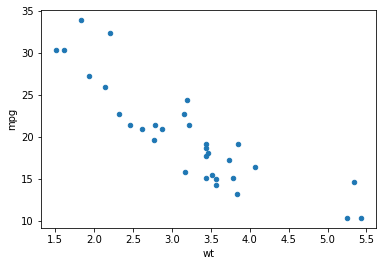

In [157]:
#Plotting weight and mpg of car against each other
mtcars.plot(kind = 'scatter', x = 'wt', y = 'mpg')
plt.show()

In [158]:
#splitting the dataset
n_train = math.floor(0.7 * X.shape[0])
n_test = math.ceil(0.3 * X.shape[0])
X_train = X[:n_train]
y_train = Y[:n_train]
X_test = X[n_train:]
y_test = Y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 22
Total Number of rows in test: 10


In [159]:
print("X:")
print(X)
print("Y:")
print(Y)

X:
0     2.620
1     2.875
2     2.320
3     3.215
4     3.440
5     3.460
6     3.570
7     3.190
8     3.150
9     3.440
10    3.440
11    4.070
12    3.730
13    3.780
14    5.250
15    5.424
16    5.345
17    2.200
18    1.615
19    1.835
20    2.465
21    3.520
22    3.435
23    3.840
24    3.845
25    1.935
26    2.140
27    1.513
28    3.170
29    2.770
30    3.570
31    2.780
Name: wt, dtype: float64
Y:
0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64


In [160]:
print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)
print("\nX_test")
print(X_test)
print("\ny_test")
print(y_test)

X_train:
0     2.620
1     2.875
2     2.320
3     3.215
4     3.440
5     3.460
6     3.570
7     3.190
8     3.150
9     3.440
10    3.440
11    4.070
12    3.730
13    3.780
14    5.250
15    5.424
16    5.345
17    2.200
18    1.615
19    1.835
20    2.465
21    3.520
Name: wt, dtype: float64

y_train:
0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
Name: mpg, dtype: float64

X_test
22    3.435
23    3.840
24    3.845
25    1.935
26    2.140
27    1.513
28    3.170
29    2.770
30    3.570
31    2.780
Name: wt, dtype: float64

y_test
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64


In [161]:
#training the model
A0, A1, reg = myFnLinReg(X_train, y_train)

In [162]:
#coefficients values
A0,A1

(37.76418744030761, -5.2899386603397724)

In [163]:
#regression model
reg

'y = 37.76418744030761 + -5.2899β'

Q8. What is the mpg of a car, whose weight is 6.7?


In [164]:
ex_x_instance=6.7
pred_y_instance=A0 + A1*ex_x_instance
pred_y_instance

2.3215984160311294

In [165]:
N=len(X)
N

32

Q9.Compute and print accuracy measures such as RMSE and R2 for the test set

In [166]:
# Calculating R-squared value 

ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

mean_y=Y.mean()

for i in range(N): # val_count represents the no.of input x values
  y_pred = A0 + A1 * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print("R-squared: ")
print(r2)

R-squared: 
0.7405807200976333


In [167]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(N):
    y_pred = A0 + A1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/N)
print("Root mean square error: ")
print(rmse)

Root mean square error: 
3.021373603787974


Q10.Apply the stochastic gradient descent and mini batch gradient descent 
algorithms to enhance the accuracy and visualize the cost function.

STOCHASTIC GRADIENT DESCENT

In [168]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()   # object for x 
sy = preprocessing.MinMaxScaler()

# df.shape[0] gives the no. of samples in the dataset
scaled_x = sx.fit_transform(mtcars['wt'].values.reshape(mtcars.shape[0],1))
scaled_y = sy.fit_transform(mtcars['mpg'].values.reshape(mtcars.shape[0],1))

In [169]:
scaled_x

array([[0.28304781],
       [0.34824853],
       [0.20634109],
       [0.43518282],
       [0.49271286],
       [0.49782664],
       [0.52595244],
       [0.42879059],
       [0.41856303],
       [0.49271286],
       [0.49271286],
       [0.65379698],
       [0.56686269],
       [0.57964715],
       [0.9555101 ],
       [1.        ],
       [0.97980056],
       [0.1756584 ],
       [0.02608029],
       [0.08233188],
       [0.24341601],
       [0.51316799],
       [0.49143442],
       [0.59498849],
       [0.59626694],
       [0.10790079],
       [0.16031705],
       [0.        ],
       [0.42367681],
       [0.32140118],
       [0.52595244],
       [0.32395807]])

In [170]:
scaled_y

array([[0.45106383],
       [0.45106383],
       [0.52765957],
       [0.46808511],
       [0.35319149],
       [0.32765957],
       [0.16595745],
       [0.59574468],
       [0.52765957],
       [0.37446809],
       [0.31489362],
       [0.25531915],
       [0.29361702],
       [0.20425532],
       [0.        ],
       [0.        ],
       [0.18297872],
       [0.93617021],
       [0.85106383],
       [1.        ],
       [0.47234043],
       [0.21702128],
       [0.20425532],
       [0.12340426],
       [0.37446809],
       [0.71914894],
       [0.66382979],
       [0.85106383],
       [0.22978723],
       [0.39574468],
       [0.19574468],
       [0.46808511]])

In [171]:
scaled_y.shape

(32, 1)

In [172]:
scaled_y.reshape(32,)

array([0.45106383, 0.45106383, 0.52765957, 0.46808511, 0.35319149,
       0.32765957, 0.16595745, 0.59574468, 0.52765957, 0.37446809,
       0.31489362, 0.25531915, 0.29361702, 0.20425532, 0.        ,
       0.        , 0.18297872, 0.93617021, 0.85106383, 1.        ,
       0.47234043, 0.21702128, 0.20425532, 0.12340426, 0.37446809,
       0.71914894, 0.66382979, 0.85106383, 0.22978723, 0.39574468,
       0.19574468, 0.46808511])

In [173]:
import random 

In [174]:
#defining stochastic_gradient_descent function
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.05):
 
    number_of_features = X.shape[1]
    
    
    w = np.ones(shape=(number_of_features)) 
    b = 0   # bias is 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        
        # selecting the random sample
        
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),20000)
w_sgd, b_sgd, cost_sgd

(array([-0.81471978]), 0.7756416796508578, 0.09279469872348908)

In [175]:
def predict(weight,w,b):
    scaled_X = sx.transform([[weight]])[0]
    # here w1 = w[0] , w2 = w[1] and bias is b
    # equation for mpg is w1*wt + bias
    # scaled_X[0] is weight

    scaled_mpg = w[0] * scaled_X[0]+ b
    # once we get mpg prediction we need to to rescale it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_mpg]])[0][0] 

In [176]:
predict(6.7,w_sgd, b_sgd) 

3.2351325018497836

In [177]:
#cost_list_sgd,epoch_list_sgd

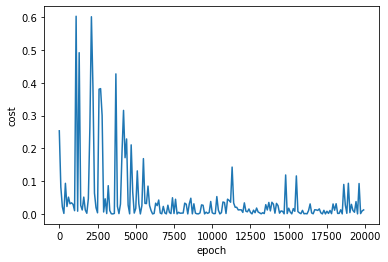

In [178]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

MINI-BATCH GRADIENT DESCENT

In [179]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.04):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features.
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([-0.8329361]), 0.7721660271531772, 0.004356408971486171)

In [180]:
cost_list, epoch_list

([0.07969084054808506,
  0.26963544117658667,
  0.1125165191697315,
  0.006469312867776642,
  0.022873000114587493,
  0.018295597814371976,
  0.006145393081984889,
  0.00036510014322660867,
  0.011514458018087223,
  0.00611807130486432,
  0.0008975085237603274,
  0.011035314246621668],
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])

In [181]:
def predict2(weight,w,b):
    scaled_X = sx.transform([[weight]])[0]
    # here w1 = w[0] , w2 = w[1] and bias is b
    # equation for mpg is w1*wt + bias
    # scaled_X[0] is weight

    scaled_mpg = w[0] * scaled_X[0]+ b
    # once we get mpg prediction we need to to rescale it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_mpg]])[0][0] 

In [182]:
#predicting the value of mpg at weight=6.7
predict2(6.7,w, b) 

2.585705045672332

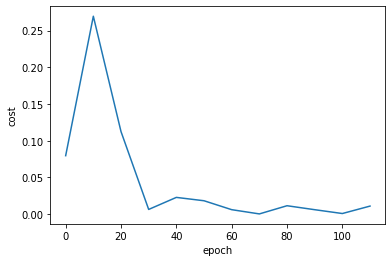

In [183]:
#plotting epoch vs cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)